<a href="https://www.kaggle.com/code/gabriellecharlton/google-data-analytics-capstone-cyclistic-inc?scriptVersionId=99179318" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cyclistic-case-study-report-gc/Num_Rides_vs_Weekday.png
/kaggle/input/cyclistic-case-study-report-gc/Cyclisticlogo.jpeg
/kaggle/input/cyclistic-case-study-report-gc/Avg_Dur_vs_Weekday.png
/kaggle/input/cyclistic-case-study-report-gc/avg_ride_length.csv
/kaggle/input/cyclistic-case-study-report-gc/all_trips_v2.csv
/kaggle/input/cyclistic-case-study-report-gc/google-data-analytics-capstone-case-study-1-pyth.ipynb
/kaggle/input/cyclistic-case-study-report-gc/all_trips.csv


# Introduction

My name is Gabrielle Charlton, and this notebook represents a summary of my analysis of the last 12 months of [Cyclistic trip data](https://divvy-tripdata.s3.amazonaws.com/index.html). I have completed the steps of Ask, Prepare, Process, Analyze, and Share. These steps were  communicated through Google via the Coursera [Google Data Analytics Professional Certification](https://www.coursera.org/professional-certificates/google-data-analytics), and this project is my **capstone project**. 

***

# Problems

The main focus of this analysis was to see the differences and similarities between casual riders and annual members for Cyclistic. This will help drive future business decisions, in the pursuit of increasing the number of annual members, mostly from the current set of casual riders. 

The graphs made from the data during the guided capstone, using the member types (annual member and casual) as hue, were:

* Number of Rides versus Weekday
* Average Duration of Rides versus Weekday

They were initially cretaed and exported via R Studio. I have brought my work over to jupyter notebooks to have more dynamic visulaization options a  dto expand my analysis, as this language I am most familiar with. 

*The two previously mentioned graphs have been replicated using Seaborn and Pyplot.*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
all_trips = pd.read_csv("../input/cyclistic-case-study-report-gc/all_trips.csv") 


In [4]:
all_trips.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,date,month,day,year,day_of_week,ride_length
0,1,99FEC93BA843FB20,electric_bike,2021-06-13 14:31,2021-06-13 14:34,NaN,NaN,NaN,NaN,member,2021-06-13,6,13,2021,Sunday,180.0
1,2,06048DCFC8520CAF,electric_bike,2021-06-04 11:18,2021-06-04 11:24,NaN,NaN,NaN,NaN,member,2021-06-04,6,4,2021,Friday,360.0
2,3,9598066F68045DF2,electric_bike,2021-06-04 9:49,2021-06-04 9:55,NaN,NaN,NaN,NaN,member,2021-06-04,6,4,2021,Friday,360.0
3,4,B03C0FE48C412214,electric_bike,2021-06-03 19:56,2021-06-03 20:21,NaN,NaN,NaN,NaN,member,2021-06-03,6,3,2021,Thursday,1500.0
4,5,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05,2021-06-04 14:09,NaN,NaN,NaN,NaN,member,2021-06-04,6,4,2021,Friday,240.0


In [5]:
all_trips.tail()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,date,month,day,year,day_of_week,ride_length
5860771,5860772,8891BA0053ECEC4F,electric_bike,2022-05-27 22:00,2022-05-27 22:07,Clark St & Newport St,632,NaN,NaN,member,2022-05-27,5,27,2022,Friday,420.0
5860772,5860773,47D8B5FBCADECFC1,electric_bike,2022-05-15 16:05,2022-05-15 16:44,Clark St & Newport St,632,NaN,NaN,member,2022-05-15,5,15,2022,Sunday,2340.0
5860773,5860774,AA8D16CF38B40703,electric_bike,2022-05-21 10:10,2022-05-21 10:26,Francisco Ave & Bloomingdale Ave,429,NaN,NaN,casual,2022-05-21,5,21,2022,Saturday,960.0
5860774,5860775,897EBFD44F329E0A,electric_bike,2022-05-12 7:53,2022-05-12 8:01,Francisco Ave & Bloomingdale Ave,429,NaN,NaN,member,2022-05-12,5,12,2022,Thursday,480.0
5860775,5860776,AAC23AB89E8A7733,electric_bike,2022-05-11 21:14,2022-05-11 21:18,Clark St & Newport St,632,NaN,NaN,member,2022-05-11,5,11,2022,Wednesday,240.0


In [6]:
all_trips['ride_length'].describe() #ride_length has been pre-processed in R Studio to become seconds

count    5.860776e+06
mean     1.241406e+03
std      9.885391e+03
min     -7.080000e+03
25%      3.600000e+02
50%      6.600000e+02
75%      1.260000e+03
max      3.356640e+06
Name: ride_length, dtype: float64

In [7]:
neg_ride_lengths = all_trips[all_trips['ride_length'] < 0].index
all_trips.drop(neg_ride_lengths, inplace=True)

In [8]:
all_trips['ride_length'].describe() # Dropping negative ride_length values like in Step 3

count    5.860691e+06
mean     1.241478e+03
std      9.885439e+03
min      0.000000e+00
25%      3.600000e+02
50%      6.600000e+02
75%      1.260000e+03
max      3.356640e+06
Name: ride_length, dtype: float64

In [9]:
avg_ride_length = all_trips.groupby(['member_casual','day_of_week']).agg({'ride_length': ['mean']})
# See the average ride time by each day for members vs casual users
print(avg_ride_length)

                           ride_length
                                  mean
member_casual day_of_week             
casual        Friday       1726.774331
              Monday       1831.645016
              Saturday     2010.456019
              Sunday       2121.039637
              Thursday     1662.460031
              Tuesday      1574.554944
              Wednesday    1599.438152
member        Friday        766.944556
              Monday        758.746750
              Saturday      877.438917
              Sunday        887.985224
              Thursday      746.551736
              Tuesday       736.730786
              Wednesday     738.567312


In [10]:
all_trips['rideable_type'].value_counts()

classic_bike     3217700
electric_bike    2368549
docked_bike       274442
Name: rideable_type, dtype: int64

In [11]:
all_trips['member_casual'].value_counts()

member    3300875
casual    2559816
Name: member_casual, dtype: int64

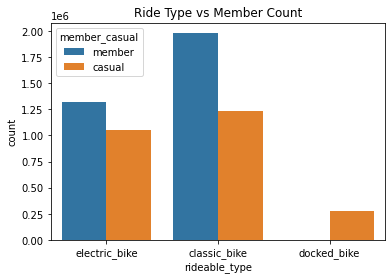

In [12]:
sns.countplot(x = 'rideable_type', data = all_trips, hue='member_casual').set(title='Ride Type vs Member Count')
plt.show()

From this anlysis, It looks like annual members tend to not borrow bikes from docking stations, and prefer first classic bikes, and second to that, electric bikes. This can be related to the purpose of bike rentals. 

To further analyze this behaviour, I will look at the days of the week frequented by the various members.

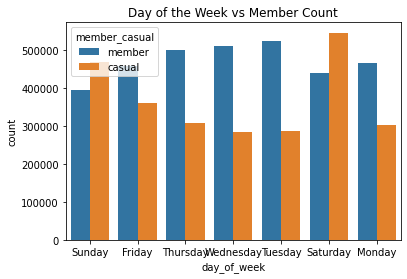

In [13]:
sns.countplot(x='day_of_week',data = all_trips, hue='member_casual').set(title='Day of the Week vs Member Count')
plt.show()

From our graph, we can see that *the two most frequented days for casual members are Saturday and Sunday*. What is interesting is that *these are the two least frequented days for annual members*. The *two most frequented days for annual members, however, happens to be Tuesday and Wednesday*. These days happen to be *the least frequented days of casual members*.

What I have deducted is that **there is an inverse relationship to the behaviours of casual and annual members during the week**.

In [14]:
all_trips[all_trips['member_casual'] == 'casual'].describe()

,Unnamed: 0,month,day,year,ride_length
count,2.559816e+06,2.559816e+06,2.559816e+06,2.559816e+06,2.559816e+06
mean,2.675134e+06,7.312510e+00,1.552865e+01,2.021210e+03,1.833054e+03
std,1.693028e+06,2.223667e+00,8.690177e+00,4.070540e-01,1.482091e+04
min,2.500000e+01,1.000000e+00,1.000000e+00,2.021000e+03,0.000000e+00
25%,1.249606e+06,6.000000e+00,8.000000e+00,2.021000e+03,5.400000e+02
50%,2.483672e+06,7.000000e+00,1.500000e+01,2.021000e+03,9.000000e+02
75%,4.002728e+06,9.000000e+00,2.300000e+01,2.021000e+03,1.680000e+03
max,5.860774e+06,1.200000e+01,3.100000e+01,2.022000e+03,3.356640e+06


This describe function tells us that the average month of use for casual riders is July, with an average ride length of 1833 seconds (30.55 minutes). However, the standard deviation is high (1.48e+04 seconds), due to the varying of ride lengths between, days, months, and bike types. This is can be seen with the lowest 25% of ride lengths being 540 seconds (9 minutes), and the range of 0% to 75% of ride lengths increasing to 1680 seconds (28 minutes). We can also look at the minumum and maxium values, where the minimum ride length was 0 seconds, and the maximum ride length was 3356640 seconds (38.85 days!). 

This means we need to break down over analysis further into the various scenrios that may cause the deviation.

In [15]:
all_trips[all_trips['member_casual'] == 'member'].describe()

,Unnamed: 0,month,day,year,ride_length
count,3.300875e+06,3.300875e+06,3.300875e+06,3.300875e+06,3.300875e+06
mean,3.128326e+06,7.193230e+00,1.554179e+01,2.021295e+03,7.827126e+02
std,1.664233e+06,2.817712e+00,8.687175e+00,4.559229e-01,1.636442e+03
min,1.000000e+00,1.000000e+00,1.000000e+00,2.021000e+03,0.000000e+00
25%,1.747929e+06,5.000000e+00,8.000000e+00,2.021000e+03,3.000000e+02
50%,3.326549e+06,7.000000e+00,1.500000e+01,2.021000e+03,5.400000e+02
75%,4.531648e+06,9.000000e+00,2.300000e+01,2.022000e+03,9.600000e+02
max,5.860776e+06,1.200000e+01,3.100000e+01,2.022000e+03,9.000000e+04


This describe function tells us that the average month of use for annual members is July, with an average ride length of 782.7 seconds (13 minutes). However, the standard deviation is also high (1.636442e+03 seconds), due to the varying of ride lengths between, days, months, and bike types. This is can be seen with the lowest 25% of ride lengths being 300 seconds (5 minutes), and the range of 0% to 75% of ride lengths increasing to 960 seconds (16 minutes). We can also look at the minumum and maxium values, where the minimum ride length was 0 seconds, and the maximum ride length was 90000 seconds (25 hours/ 1 day and 1 hour). Although this is max value much less than the ride lnegth of casual riders,it shows the possiblity of crossover ebtween casual riders and annual members.

This means we need to break down over analysis further into the various scenarios and look for any crossover betwwne teh two groups.

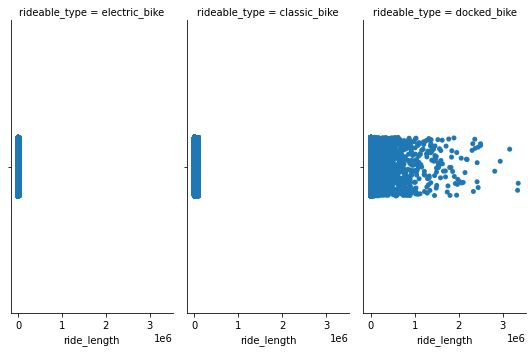

In [16]:
sns.catplot(x = 'ride_length',data = all_trips, col='rideable_type',
           aspect=0.5)
plt.show()

**Docked bikes seem to have the highest ride lengths out of all three bikes.** As a quick refresher, *docked bikes are practically only used by casual riders*. In order to truly understand how to convert casual riders into annual members, we will need to look at how casual riders are using docked bikes for their trips. 

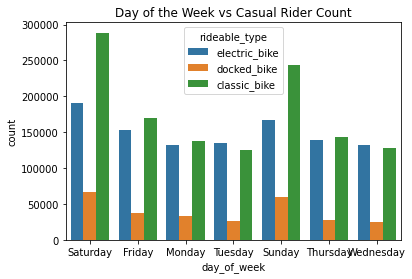

In [17]:
sns.countplot(x='day_of_week',data = all_trips[all_trips['member_casual'] == 'casual'], hue='rideable_type').set(title='Day of the Week vs Casual Rider Count')
plt.show()

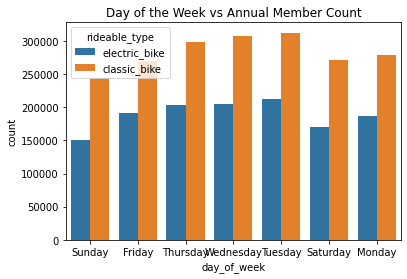

In [18]:
sns.countplot(x='day_of_week',data = all_trips[all_trips['member_casual'] == 'member'], hue='rideable_type').set(title='Day of the Week vs Annual Member Count')
plt.show()

What this graph is telling us is that **Saturday and Sunday are the days most used by casual members for all bike types**, yet docked bikes are the least used bikes out of all the bike types. 

If we want to focus on the most frequented bike type used by both annual members and casual members, we can shift our focus onto classic bikes.

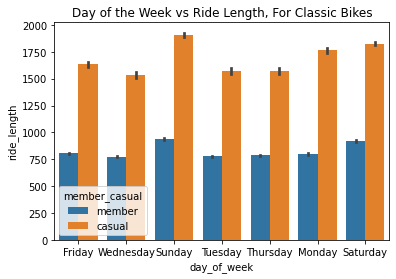

In [19]:
sns.barplot(x='day_of_week', y='ride_length', 
            data = all_trips[all_trips['rideable_type'] == 'classic_bike'], 
            hue='member_casual').set(title='Day of the Week vs Ride Length, For Classic Bikes')
plt.show()

Despite Sunday being the least frequented in the count of annual members, the length of rides is the highest on Sunday. Sunday is the second highest frequented day for casual riders, but has the longest ride length. So the classic bike crossover day for both member types seems to be Sunday, since casual members:
* tend to have longer rides
* frequent Sunday, Saturday and Friday the most, (in respective order)
* highest frequented bike type is classic

and annual members:
* longest ride lengths are on Sunday, Saturday and Monday (in respective order)
* highest frequented bike type is classic

**Focusing classic bike marketing toward casual riders in an effort to convert them to annual members could be a good area to try, specifically on Sunday and Saturday.** 

*Docked bikes wouldn't have been a good campaign, simply because annual mebers tend to not use docked bikes.*

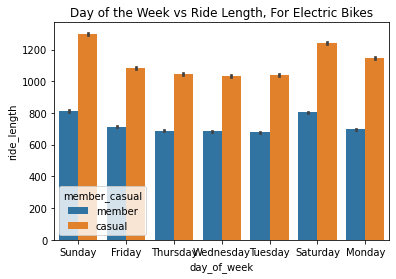

In [20]:
sns.barplot(x='day_of_week', y='ride_length', 
            data = all_trips[all_trips['rideable_type'] == 'electric_bike'], 
            hue='member_casual').set(title='Day of the Week vs Ride Length, For Electric Bikes')
plt.show()

Again, despit Sunday being the least frequented in the count of annual members, the length of rides is the highest on Sunday. Sunday is the second highest frequented day for casual riders, but has the longest ride length. So the electric bike crossover day for both member types seems to be Sunday as well. 

**Focusing electric and classical bike marketing toward casual riders in an effort to convert them to annual members could be a good area to try, specifically on Sunday and Saturday.** 

*Once again, docked bikes wouldn't have been a good campaign, simply because annual mebers tend to not use docked bikes.*

Now I will analyze ride lengths to find the relationship between casual riders and annual members for each month. 

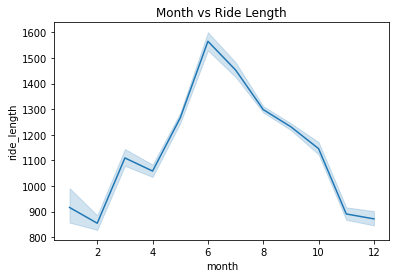

In [21]:
sns.lineplot(x='month', y='ride_length', data=all_trips).set(title='Month vs Ride Length')
plt.show()

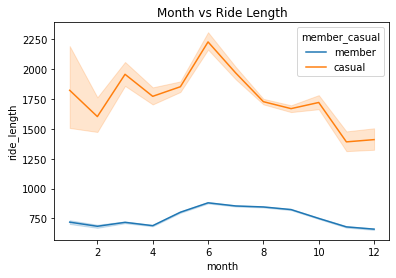

In [22]:
sns.lineplot(x='month', y='ride_length', data=all_trips, hue=all_trips['member_casual']).set(title='Month vs Ride Length')
plt.show()

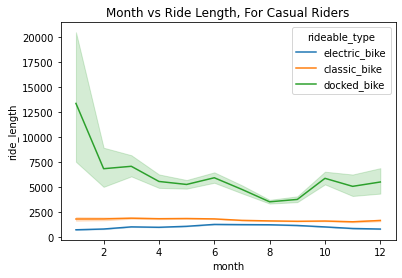

In [23]:
sns.lineplot(x='month', y='ride_length', 
             data=all_trips[all_trips['member_casual'] == 'casual'], 
             hue=all_trips['rideable_type']).set(title='Month vs Ride Length, For Casual Riders')
plt.show()

This tells us that the highest amount of ride length throughout the year was for docked bikes. This coincides with what we've previously stated. However, since the standard deviation between docked bike usage and the other bike types, I will exclude this value from the dataframe to get a better look at classic and electric bike usage. 

In [24]:
no_dock_cas = all_trips[all_trips.rideable_type != 'docked_bike']
no_dock_cas.describe()

,Unnamed: 0,month,day,year,ride_length
count,5.586249e+06,5.586249e+06,5.586249e+06,5.586249e+06,5.586249e+06
mean,2.957841e+06,7.247969e+00,1.555428e+01,2.021261e+03,1.057434e+03
std,1.687302e+06,2.600876e+00,8.690693e+00,4.394047e-01,2.672799e+03
min,1.000000e+00,1.000000e+00,1.000000e+00,2.021000e+03,0.000000e+00
25%,1.503719e+06,5.000000e+00,8.000000e+00,2.021000e+03,3.600000e+02
50%,2.980813e+06,7.000000e+00,1.500000e+01,2.021000e+03,6.600000e+02
75%,4.415754e+06,9.000000e+00,2.300000e+01,2.022000e+03,1.140000e+03
max,5.860776e+06,1.200000e+01,3.100000e+01,2.022000e+03,9.360000e+04


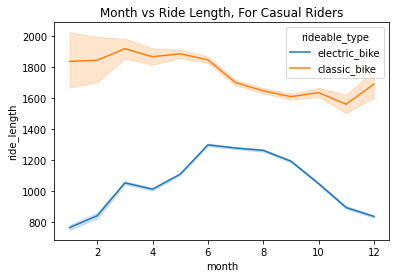

In [25]:
sns.lineplot(x='month', y='ride_length', 
             data=no_dock_cas[no_dock_cas['member_casual'] == 'casual'], 
             hue=no_dock_cas['rideable_type']).set(title='Month vs Ride Length, For Casual Riders')
plt.show()

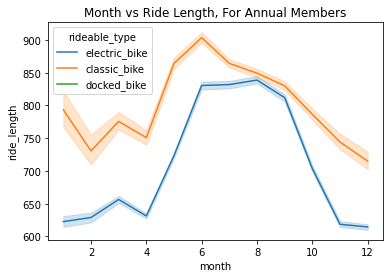

In [26]:
sns.lineplot(x='month', y='ride_length', data=all_trips[all_trips['member_casual'] == 'member'], hue=all_trips['rideable_type']).set(title='Month vs Ride Length, For Annual Members')
plt.show()

For both, the most frequented month is June, yet the ride length variation between the months seem to deviate more with casual riders rather than annual members. On closer inspection, it looks like with casual riders:
* **classic bikes** had the **highest ride lengths during March** *(second in May)*, and the **lowest in November** *(second in September)*
* **electric bikes** had the **highest ride lengths during June** *(second in August)*, and the **lowest in January** *(second in February)*


For annual members:

* **classic bikes** had the **highest ride lengths during June** *(second in July)*, and the **lowest in December** *(second in February)*
* **electric bikes** had the **highest ride lengths during August** *(second in June)*, and the **lowest in December** *(second in January)*

<hr ***/>

I found a few crossover months for usage amounts:

* **electric bikes** for both casual riders and annual members were **both high in August and June**, and **low in January**
* **classical bikes** didn't have any direct months matching, but the **closest months of high usage were May and June**, and for **low usage, the closest months were November and December**


Now that we focused on day to day behaviour, let's look at the dataset iteself to see what proportion of our base represents our target demographic: casual riders who would be willing to upgrade to an annual membership.

A few questions that arise are:

* What is the unique count of members?
* Are there any repeat customers?
* What is the percentage of casual and annual members in this dataset?
* Is the data skewed or biased to one member type?

In [27]:
all_trips.groupby('member_casual')['member_casual'].nunique()

member_casual
casual    1
member    1
Name: member_casual, dtype: int64

In [28]:
all_trips['member_casual'].value_counts()

member    3300875
casual    2559816
Name: member_casual, dtype: int64

In [29]:
perc_cas = np.round((2559816 / (3300875 + 2559816)), 5)
print("The percent value of casual members in this dataset is " , perc_cas , ", or ", (perc_cas * 100) , "% . ")

The percent value of casual members in this dataset is  0.43678 , or  43.678 % . 


In [30]:
perc_an = np.round((3300875 / (3300875 + 2559816)), 5)
print("The percent value of annual members in this dataset is " , perc_an , ", or ", (perc_an * 100) , "% . ")

The percent value of annual members in this dataset is  0.56322 , or  56.322 % . 


In [31]:
member_prop = all_trips.groupby(['member_casual','rideable_type']).agg({'member_casual': ['count']})
# See the average ride time by each day for members vs casual users
print(member_prop)

                            member_casual
                                    count
member_casual rideable_type              
casual        classic_bike        1236522
              docked_bike          274442
              electric_bike       1048852
member        classic_bike        1981178
              electric_bike       1319697


In [32]:
perc_cas_clas1 = np.round((1236522 / (2559816)), 7)
perc_cas_clas2 = np.round((perc_cas_clas1 * perc_cas), 7)
print("The percent value of casual members that ride classic bikes is " , (perc_cas_clas1 * 100) , 
      "% , in proportion to all casual riders, and ", (perc_cas_clas2 * 100), "% in propportion to all riders in the dataset" )

print("-----------------------------------------------")

perc_cas_elec1 = np.round((1048852 / (2559816)), 7)
perc_cas_elec2 = np.round((perc_cas_elec1 * perc_cas), 7)
print("The percent value of casual members that ride electric bikes is " , (perc_cas_elec1 * 100) , 
      "% , in proportion to all casual riders, and ", (perc_cas_elec2* 100), "% in propportion to all riders in the dataset" )

print("-----------------------------------------------")

perc_cas_dock1 = np.round((274442 / (2559816)), 7)
perc_cas_dock2 = np.round((perc_cas_dock1 * perc_cas), 7)
print("The percent value of casual members that ride docked bikes is " , (perc_cas_dock1 * 100) , 
      "% , in proportion to all casual riders, and ", (perc_cas_dock2 * 100), "% in propportion to all riders in the dataset" )

The percent value of casual members that ride classic bikes is  48.30511 % , in proportion to all casual riders, and  21.09871 % in propportion to all riders in the dataset
-----------------------------------------------
The percent value of casual members that ride electric bikes is  40.97373 % , in proportion to all casual riders, and  17.89651 % in propportion to all riders in the dataset
-----------------------------------------------
The percent value of casual members that ride docked bikes is  10.721160000000001 % , in proportion to all casual riders, and  4.68279 % in propportion to all riders in the dataset


In [33]:
perc_an_clas1 = np.round((1981178 / (3300875)), 7)
perc_an_clas2 = np.round((perc_an_clas1 * perc_an), 7)
print("The percent value of annual members that ride classic bikes is " , (perc_an_clas1 * 100) , 
      "% , in proportion to all annual riders, and ", (perc_an_clas2 * 100), "% in propportion to all riders in the dataset" )

print("-----------------------------------------------")

perc_an_elec1 = np.round((1319697 / (3300875)), 7)
perc_an_elec2 = np.round((perc_an_elec1 * perc_an), 7)
print("The percent value of annual members that ride electric bikes is " , (perc_an_elec1 * 100) , 
      "% , in proportion to all annual riders, and ", (perc_an_elec2* 100), "% in propportion to all riders in the dataset" )


The percent value of annual members that ride classic bikes is  60.01978 % , in proportion to all annual riders, and  33.804339999999996 % in propportion to all riders in the dataset
-----------------------------------------------
The percent value of annual members that ride electric bikes is  39.98022 % , in proportion to all annual riders, and  22.51766 % in propportion to all riders in the dataset


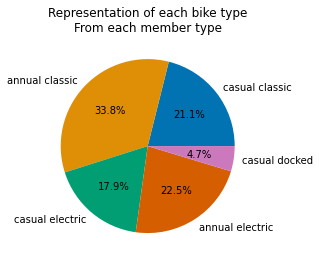

In [34]:
bike_member_perc = [perc_cas_clas2, perc_an_clas2, perc_cas_elec2, perc_an_elec2, perc_cas_dock2]
label=['casual classic', 'annual classic', 'casual electric', 'annual electric', 'casual docked']

colors = sns.color_palette('colorblind')

plt.pie(bike_member_perc, labels = label, colors = colors, autopct='%1.1f%%')
plt.title("Representation of each bike type\n" + "From each member type")
plt.show()

From this, we can be reassured that:
* The distribution of casual versus annual members was 50/50, so the data was not skewed in the way of counts. This was previously stated in the .describe() stated earlier 
* Electric bike usage was roughly the same for both annual and casual members
* Classical bike usage was the highest with annual members, yet casual riders used classic bikes the most out of all bike types
* docked bikes only made up a small percentage of all bikes used

### Summary

#### From this analysis, we can conclude a few findings:

#### Rider Behaviour
* there is an **inverse relationship to the behaviours of casual and annual members during the week**. The **two most frequented days for casual members are Saturday and Sunday**, however, the two **most frequented days for annual members** happen to be **Tuesday and Wednesday**
* **electric bikes** for both casual riders and annual members were **both high in August and June**, and **low in January**
* **classical bikes** didn't have any direct months matching, but the **closest months of high usage were May and June**, and for **low usage, the closest months were November and December**


#### Data Representation
* The distribution of casual versus annual members was 50/50, so the data was not skewed in the way of counts
* Electric bike usage was roughly the same for both annual and casual members
* Classical bike usage was the highest with annual members, yet casual riders used classic bikes the most out of all bike types
* docked bikes only made up a small percentage of all bikes used
<hr */>
* The percent value of **casual members that ride classic bikes is approx. 48 %**, in proportion to all casual riders
* The percent value of **casual members that ride electric bikes is approx. 41 %** , in proportion to all casual riders
* The percent value of **casual members that ride docked bikes is approx. 11 %** , in proportion to all casual riders.
* The percent value of **annual members that ride classic bikes is approx. 60 %** , in proportion to all annual riders.
* The percent value of **annual members that ride electric bikes is approx. 40 %** , in proportion to all annual riders.

# Solutions

A few solutions I can offer in regards to converting casual riders to annual members is to:

* Use the crossover months to stragetize marketing efforts throughout the year
* Use rider behviours to come up with promotions in lieu of annual mebership that can generate long term profits for the company

# Conclusion

In conclusion, this dataset shows that although casual riders and annual members have an inverted relationship of usage during the week, throughout teh year their activities do align through the seasons. 

I've learned that analyzing  data and looking how the representation of something can be done in many different ways. So, I was happy to test out my PyStack (numpy, pandas, and seaborn), using brute force (percentage calculations) and organizing code in a way that can make it easy to follow along with. 

# Next Steps

The solution I think would be to consider using promotional material to build loyalty within the Cyclistic member base. Casual riders do have the longest ride lengths, so looking at their behaviour and taioloring programs that suit them could build usage of the subscription, leading them to the need to upgrade to an annual membership to save on costs from an increased level of usage. 